<a href="https://colab.research.google.com/github/Nabeel110/Emotion-Recognition/blob/master/Emotion_Recognizer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Emotion_Recognition_Model
#Check the present working directory using pwd command

/content/gdrive/My Drive/Emotion_Recognition_Model


# Importing Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing tesnsorflow model libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.models import model_from_json,load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import *

# Loading Data

In [ ]:
data = pd.read_csv('fer2013.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [ ]:
data['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

- As we can see from dataset that we have Training, PublicTest and PrivateTest.
- I have decided to use entire training dataset for training and PublicTest as validation while PrivateTest as Test Dataset.

* The reason oforf my choice is we want our model at the end to perform well on TestData and PublicTest Data seems to be the best choice for me.

# Exploarotory Data Analysis

# Lets  Examine Our Labels in our emotion Columns and see what it gets encoded to.

label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
*   0 -> Anger
*   1 -> Disgust
*   2 -> Fear
*   3 -> Happy
*   4 -> Sad
*   5 -> Surprise
*   6 -> Neutral
---
So, above we can see what each number in emotion column gets mapped to.
Now we are all set to extract features and make our dataset.

## So, Lets Do it!







In [ ]:
labels = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
training_data = data.iloc[:28709,:]
validation_data = data.iloc[28709:(28709 + 3589), :]
testing_data =  data.iloc[(28709 + 3589):,:]

In [ ]:
training_data.tail()

,emotion,pixels,Usage
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training
28708,4,195 199 205 206 205 203 206 209 208 210 212 21...,Training


### Let's save pur training, validation and testing data as csv file

In [ ]:
training_data.to_csv('Training_Data.csv',index= False)
validation_data.to_csv('Validation_Data.csv', index= False)
testing_data.to_csv('Testing_Data.csv', index= False)

In [ ]:
# lets check what we have got.
# Below shows Training Data we just saved
train_data = pd.read_csv('Training_Data.csv')
train_data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...,Training
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...,Training
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...,Training
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...,Training


In [ ]:
# lets check what we have got in our Validation data.
# Below shows Validation Data we just saved
val_data = pd.read_csv('Validation_Data.csv')
val_data

,emotion,pixels,Usage
0,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...,PublicTest
1,1,156 184 198 202 204 207 210 212 213 214 215 21...,PublicTest
2,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...,PublicTest
3,6,205 203 236 157 83 158 120 116 94 86 155 180 2...,PublicTest
4,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...,PublicTest
...,...,...,...
3584,4,178 176 172 173 173 174 176 173 166 166 206 22...,PublicTest
3585,3,25 34 42 44 42 47 57 59 59 58 54 51 50 56 63 6...,PublicTest
3586,4,255 255 255 255 255 255 255 255 255 255 255 25...,PublicTest
3587,4,33 25 31 36 36 42 69 103 132 163 175 183 187 1...,PublicTest


In [ ]:
# lets check what we have got in our Testing data.
# Below shows Testing Data we just saved
test_data = pd.read_csv('Testing_Data.csv')
test_data

,emotion,pixels,Usage
0,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...,PrivateTest
1,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...,PrivateTest
2,6,232 240 241 239 237 235 246 117 24 24 22 13 12...,PrivateTest
3,4,200 197 149 139 156 89 111 58 62 95 113 117 11...,PrivateTest
4,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...,PrivateTest
...,...,...,...
3584,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
3585,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
3586,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
3587,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


# Extracting Features and Converting into shape of (N,48,48,1)

In [ ]:
# defining a function to extract features
def extract_features(filename):
  X = []
  Y = []
  headers = True
  for line in open(filename):
    if headers:
      headers = False
    else:
      row = line.split(',')
      Y.append(int(row[0]))
      X.append([int(feature) for feature in row[1].split()])
      
  X,Y = np.array(X)/255.0, np.array(Y)

  return (X,Y)


In [ ]:
train_file_name = 'Training_Data.csv'
val_file_name = 'Validation_Data.csv'
test_file_name = 'Testing_Data.csv'

In [ ]:
train_X, train_Y = extract_features(train_file_name)
val_X, val_Y = extract_features(val_file_name)
test_X, test_Y = extract_features(test_file_name)

In [ ]:
train_X = np.array(train_X,'float32')
train_Y = np.array(train_Y,'float32')
val_X = np.array(val_X,'float32')
val_Y = np.array(val_Y,'float32')
test_X = np.array(test_X,'float32')
test_Y = np.array(test_Y,'float32')

In [ ]:
print(train_X.shape)
print(train_Y.shape)
print(val_X.shape)
print(val_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(28709, 2304)
(28709,)
(3589, 2304)
(3589,)
(3589, 2304)
(3589,)


- From Above shapes we can see we need to reshape our data to the required input shape

In [ ]:
num_class = len(set(train_Y))
print(num_class)

7


# Training Examles (N) = 28709
- Image Dimensions (D) -> extracted from X and reshaped into 48 by 48 grayscale

- Similarly we do for validation adn testing data

In [ ]:
# N= training examples, D= Dimensions
N, D = train_X.shape
val_n,val_d = val_X.shape
test_n, test_d = test_X.shape
train_X = train_X.reshape(N, 48, 48, 1)
val_X = val_X.reshape(val_n, 48, 48, 1)
test_X = test_X.reshape(test_n,48,48,1)

In [ ]:
display(train_X.shape)
display(val_X.shape)
display(test_X.shape)

(28709, 48, 48, 1)

(3589, 48, 48, 1)

(3589, 48, 48, 1)

In [ ]:
train_Y[0]

0.0

- Since we have to predict a category of emotion out of 7 emotions,  we'll use to_categorical to convert our target variables into one-hot.

In [ ]:
Y_train = to_categorical(train_Y, num_classes=num_class)
Y_val   = to_categorical(val_Y, num_classes=num_class)
Y_test  = to_categorical(test_Y, num_classes=num_class)

In [ ]:
Y_test.shape

(3589, 7)

# Helper Functions
- Plotting Function
- Emotion Analysis
- Display Prediction 

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
import matplotlib.pyplot as plt
def plot(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [ ]:
from skimage import io
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def display_predictions(img_file,model):
  img = image.load_img(img_file, grayscale=True, target_size=(48, 48))
  show_img=image.load_img(img_file, grayscale=False, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  x /= 255

  custom = model.predict(x)
  #print(custom[0])
  emotion_analysis(custom[0])

  x = np.array(x, 'float32')
  x = x.reshape([48, 48]);

  plt.gray()
  plt.imshow(show_img)
  plt.show()

  m=0.000000000000000000001
  a=custom[0]
  for i in range(0,len(a)):
      if a[i]>m:
          m=a[i]
          ind=i
          
  print('Expression Prediction:',objects[ind])

def base_model():
  #1st convolution layer
  model = Sequential()

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
  model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
  
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
  model.add(Dropout(0.5))

  #2nd convolution layer
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
  model.add(Dropout(0.5))

  #3rd convolution layer
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

  model.add(Flatten())

  #fully connected neural networks
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.2))

  model.add(Dense(num_labels, activation='softmax'))
  return model

## Output 

Epoch 1/30
449/449 [==============================] - 8s 18ms/step - loss: 1.8173 - accuracy: 0.2481 - val_loss: 1.8151 - val_accuracy: 0.2494
Epoch 2/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8115 - accuracy: 0.2513 - val_loss: 1.8119 - val_accuracy: 0.2494
Epoch 3/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8118 - accuracy: 0.2513 - val_loss: 1.8114 - val_accuracy: 0.2494
Epoch 4/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8113 - accuracy: 0.2513 - val_loss: 1.8138 - val_accuracy: 0.2494
Epoch 5/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8113 - accuracy: 0.2513 - val_loss: 1.8125 - val_accuracy: 0.2494
Epoch 6/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8114 - accuracy: 0.2513 - val_loss: 1.8115 - val_accuracy: 0.2494
Epoch 7/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8110 - accuracy: 0.2513 - val_loss: 1.8127 - val_accuracy: 0.2494
Epoch 8/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8111 - accuracy: 0.2513 - val_loss: 1.8116 - val_accuracy: 0.2494
Epoch 9/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8111 - accuracy: 0.2513 - val_loss: 1.8113 - val_accuracy: 0.2494
Epoch 10/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8109 - accuracy: 0.2513 - val_loss: 1.8129 - val_accuracy: 0.2494
Epoch 11/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8107 - accuracy: 0.2513 - val_loss: 1.8122 - val_accuracy: 0.2494
Epoch 12/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8106 - accuracy: 0.2513 - val_loss: 1.8123 - val_accuracy: 0.2494
Epoch 13/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8109 - accuracy: 0.2513 - val_loss: 1.8114 - val_accuracy: 0.2494
Epoch 14/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8106 - accuracy: 0.2513 - val_loss: 1.8123 - val_accuracy: 0.2494
Epoch 15/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8108 - accuracy: 0.2513 - val_loss: 1.8114 - val_accuracy: 0.2494
Epoch 16/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8108 - accuracy: 0.2513 - val_loss: 1.8116 - val_accuracy: 0.2494
Epoch 17/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8123 - val_accuracy: 0.2494
Epoch 18/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8106 - accuracy: 0.2513 - val_loss: 1.8130 - val_accuracy: 0.2494
Epoch 19/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8110 - accuracy: 0.2513 - val_loss: 1.8123 - val_accuracy: 0.2494
Epoch 20/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8104 - accuracy: 0.2513 - val_loss: 1.8116 - val_accuracy: 0.2494
Epoch 21/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8122 - val_accuracy: 0.2494
Epoch 22/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8108 - accuracy: 0.2513 - val_loss: 1.8116 - val_accuracy: 0.2494
Epoch 23/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8106 - accuracy: 0.2513 - val_loss: 1.8111 - val_accuracy: 0.2494
Epoch 24/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8104 - accuracy: 0.2513 - val_loss: 1.8110 - val_accuracy: 0.2494
Epoch 25/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8106 - accuracy: 0.2513 - val_loss: 1.8126 - val_accuracy: 0.2494
Epoch 26/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8104 - accuracy: 0.2513 - val_loss: 1.8119 - val_accuracy: 0.2494
Epoch 27/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8107 - accuracy: 0.2513 - val_loss: 1.8120 - val_accuracy: 0.2494
Epoch 28/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8111 - val_accuracy: 0.2494
Epoch 29/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8107 - accuracy: 0.2513 - val_loss: 1.8112 - val_accuracy: 0.2494
Epoch 30/30
449/449 [==============================] - 8s 17ms/step - loss: 1.8105 - accuracy: 0.2513 - val_loss: 1.8126 - val_accuracy: 0.2494

## So, you can see that the results from our previous model were pretty bad as our training and validation accuracy were not really increasing

### Question comes what changes were brough in next Model architecture?

- Addition of a batchNormalization layer.
- Using Dense layer node of 128
- making use of regularizers, 
- learning rate 0.001

# Making our Tuned Model

In [ ]:
# Ignore the name :P
def base_model():
    model = Sequential()
    input_shape = (48,48,1)
    #1st convolution layer
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    #2nd convolution layer
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    #3rd convolution layer
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    my_optimiser = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam')
    
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=my_optimiser)
    
    return model

In [ ]:
model_1 = base_model()
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       4

**The First Step in making a model is Overfitting it. So Let's Do That. We'll train our model for 80 epochs and you'll see that training accuracy will increase but our validataion will be stuck at around 0.6 something**

In [ ]:
history = model_1.fit(train_X,     
            Y_train, 
            batch_size=64, 
            epochs=80, 
            verbose=1, 
            validation_data=(val_X,Y_val),
            shuffle=True,
            )

Epoch 1/80
449/449 [==============================] - 34s 75ms/step - loss: 1.7900 - accuracy: 0.2939 - val_loss: 1.6873 - val_accuracy: 0.3310
Epoch 2/80
449/449 [==============================] - 33s 73ms/step - loss: 1.5384 - accuracy: 0.4014 - val_loss: 1.4614 - val_accuracy: 0.4380
Epoch 3/80
449/449 [==============================] - 33s 73ms/step - loss: 1.3892 - accuracy: 0.4610 - val_loss: 1.4042 - val_accuracy: 0.4494
Epoch 4/80
449/449 [==============================] - 33s 73ms/step - loss: 1.2742 - accuracy: 0.5123 - val_loss: 1.3127 - val_accuracy: 0.4976
Epoch 5/80
449/449 [==============================] - 33s 73ms/step - loss: 1.2019 - accuracy: 0.5440 - val_loss: 1.2286 - val_accuracy: 0.5330
Epoch 6/80
449/449 [==============================] - 33s 73ms/step - loss: 1.1469 - accuracy: 0.5676 - val_loss: 1.2235 - val_accuracy: 0.5372
Epoch 7/80
449/449 [==============================] - 33s 73ms/step - loss: 1.0993 - accuracy: 0.5849 - val_loss: 1.1650 - val_accuracy:

- As uou can see the validation remains stuck at around 0.65 despite training accuracy improving

- We'll save this model for later testing and move to drawing analysis from our model

In [ ]:
model_1.save('base_model(fer).h5')

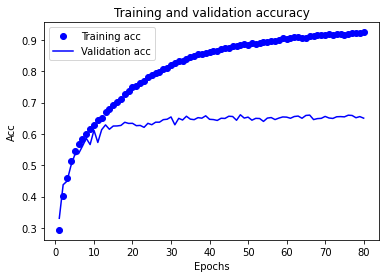

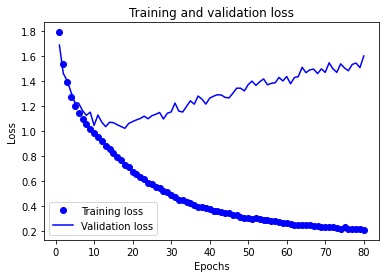

In [ ]:
# Lets plot the graph and see what it tell us
plot(history)

### We can clearly see how much we are overfitting.
- Validation Accuracy becomes stragnant at around 10 epochs

## Takeaways
- We can just train our model to about 10 epochs or less to get better result and save resources.

## Predictions From our Overfitted Model

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


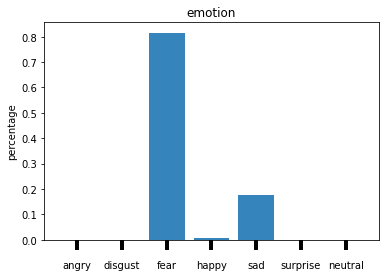

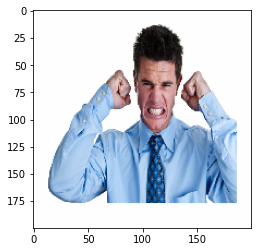

Expression Prediction: fear


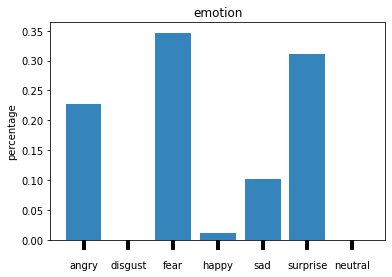

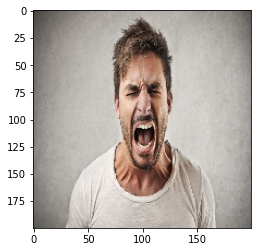

Expression Prediction: fear


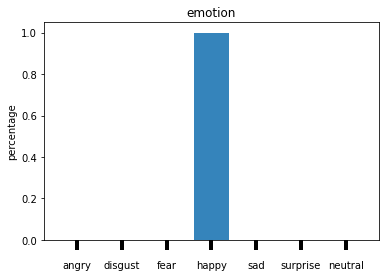

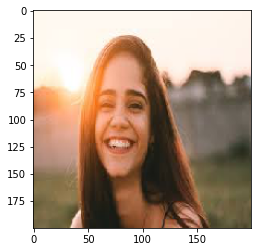

Expression Prediction: happy


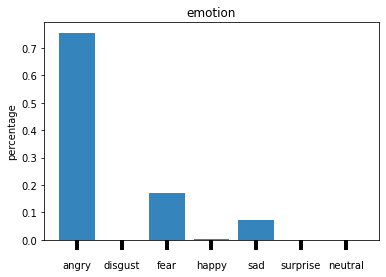

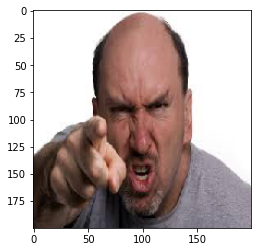

Expression Prediction: angry


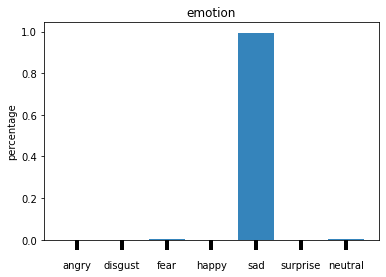

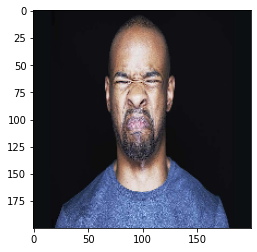

Expression Prediction: sad


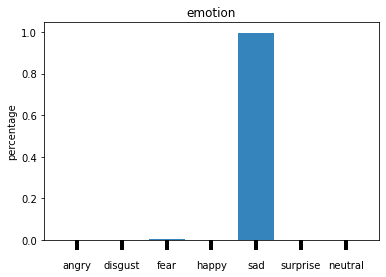

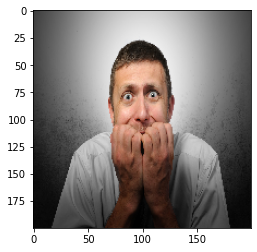

Expression Prediction: sad


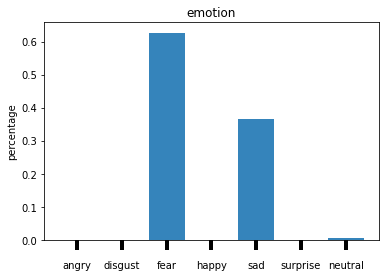

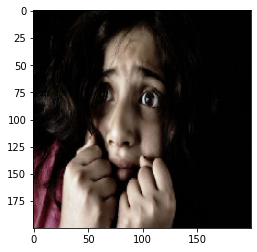

Expression Prediction: fear


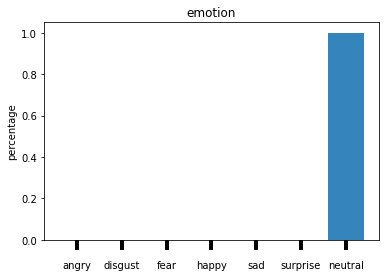

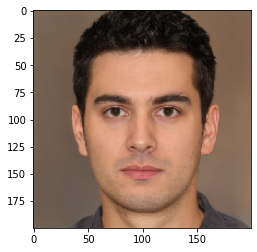

Expression Prediction: neutral


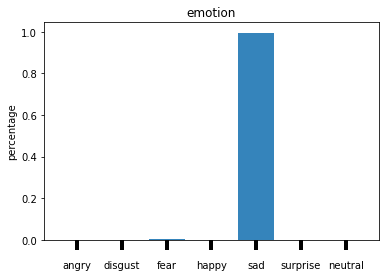

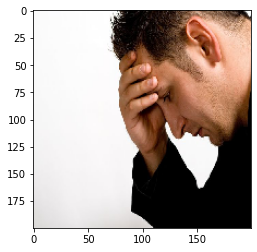

Expression Prediction: sad


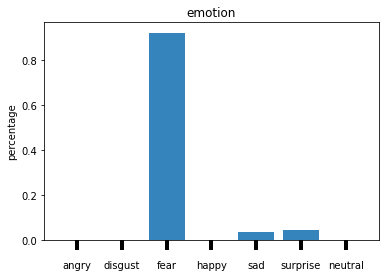

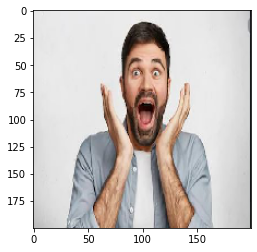

Expression Prediction: fear


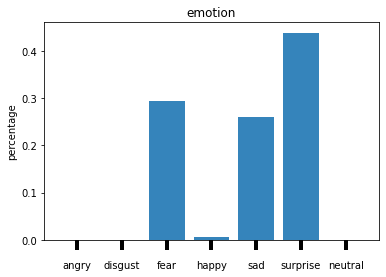

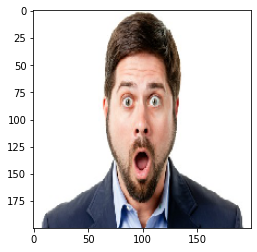

Expression Prediction: surprise


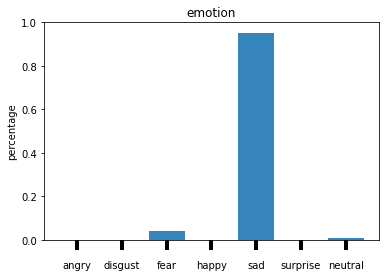

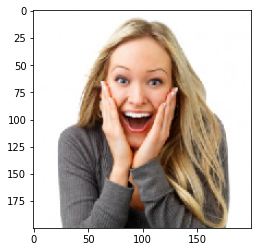

Expression Prediction: sad


In [ ]:
for img in ['angry-3.png','angry-2.jpg','happy.jpg','angry.jpg','disgust.jpg','fear-1.jpg','fear.jpg','neutral.jpg','sad.jpeg','surprise-1.jpg','surprise-3.jpg','surprise.jpg']:
  display_predictions(img,model_1)

**The Model predicts pretty well! Right!, Ignoring some mispredictions here and there**

In [ ]:
# Evaluating our overfitted model on PrivateTest dataset
evaluation = model_1.evaluate(test_X, Y_test)
evaluation

113/113 [==============================] - 2s 16ms/step - loss: 1.5418 - accuracy: 0.6595


[1.541785478591919, 0.6595152020454407]

In [ ]:
# Lets train the same model architecture for about 12 epochs
model_2 = base_model()

hist_2 = model_2.fit(train_X, Y_train,
            batch_size=64, 
            epochs=12, 
            verbose=1, 
            validation_data=(val_X, Y_val),
            shuffle=True,)

Epoch 1/12
449/449 [==============================] - 33s 74ms/step - loss: 1.7830 - accuracy: 0.2982 - val_loss: 1.6190 - val_accuracy: 0.3761
Epoch 2/12
449/449 [==============================] - 33s 73ms/step - loss: 1.5329 - accuracy: 0.4069 - val_loss: 1.4939 - val_accuracy: 0.4369
Epoch 3/12
449/449 [==============================] - 33s 73ms/step - loss: 1.3795 - accuracy: 0.4692 - val_loss: 1.4284 - val_accuracy: 0.4492
Epoch 4/12
449/449 [==============================] - 33s 73ms/step - loss: 1.2846 - accuracy: 0.5084 - val_loss: 1.2295 - val_accuracy: 0.5269
Epoch 5/12
449/449 [==============================] - 33s 73ms/step - loss: 1.2114 - accuracy: 0.5396 - val_loss: 1.1997 - val_accuracy: 0.5405
Epoch 6/12
449/449 [==============================] - 33s 73ms/step - loss: 1.1667 - accuracy: 0.5561 - val_loss: 1.2004 - val_accuracy: 0.5313
Epoch 7/12
449/449 [==============================] - 33s 74ms/step - loss: 1.1204 - accuracy: 0.5778 - val_loss: 1.1420 - val_accuracy:

Lets Plot this Model

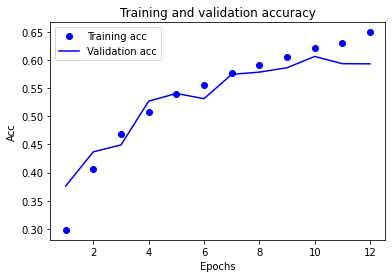

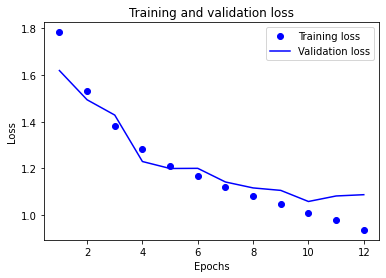

In [ ]:
plot(hist_2)

- As we can see after 10 epoch the validation loss flattens out so we are good to go now. 
- Let's save the model for future use

In [ ]:
model_2.save('tuned_model(fer-12-epochs).h5')

## Let's make predictions from the model

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


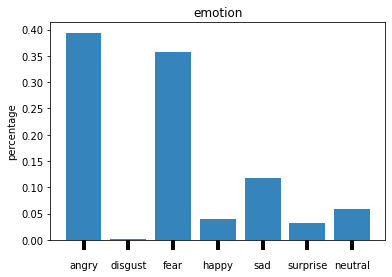

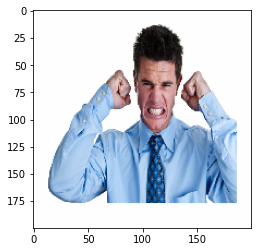

Expression Prediction: angry


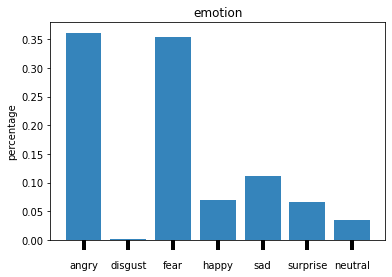

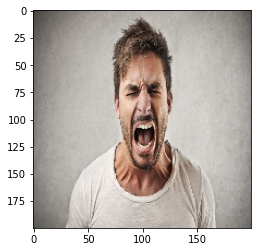

Expression Prediction: angry


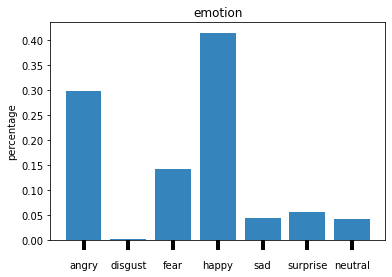

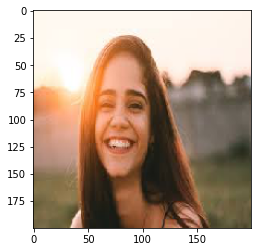

Expression Prediction: happy


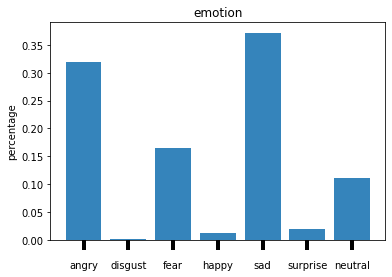

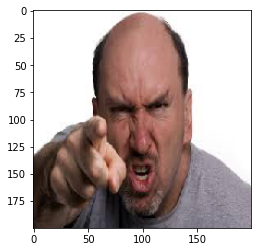

Expression Prediction: sad


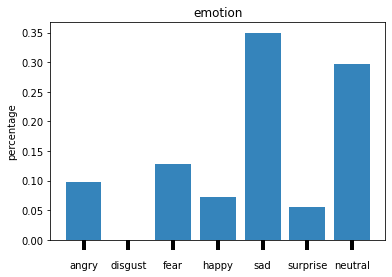

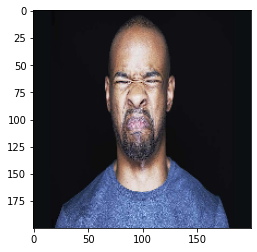

Expression Prediction: sad


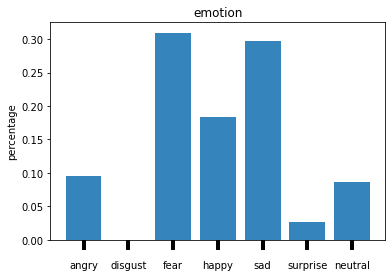

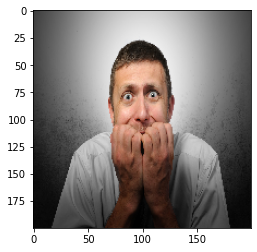

Expression Prediction: fear


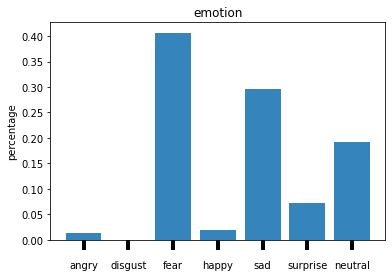

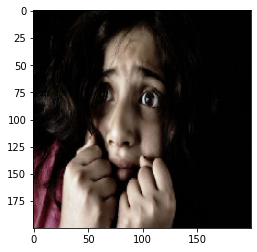

Expression Prediction: fear


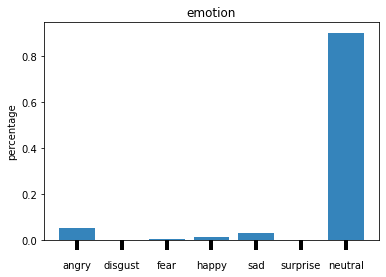

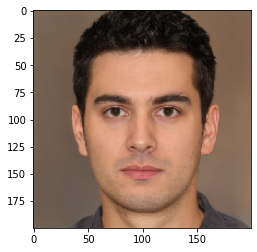

Expression Prediction: neutral


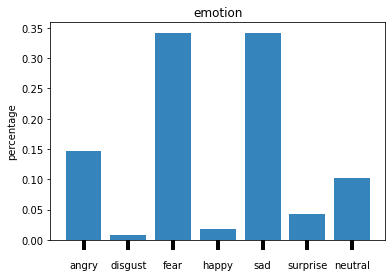

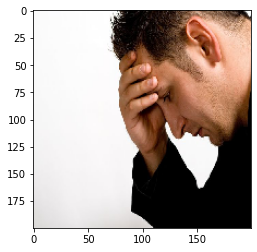

Expression Prediction: sad


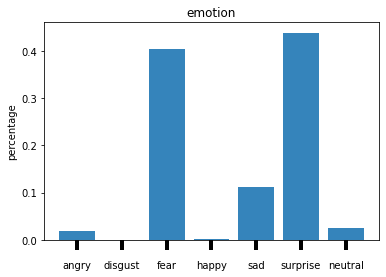

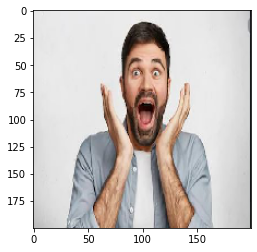

Expression Prediction: surprise


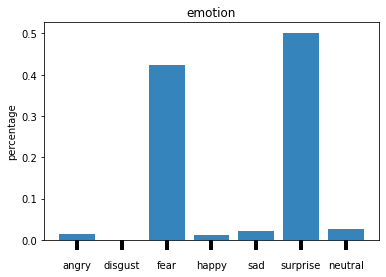

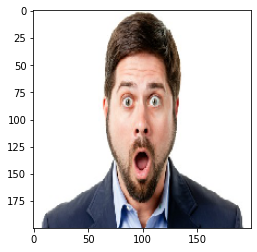

Expression Prediction: surprise


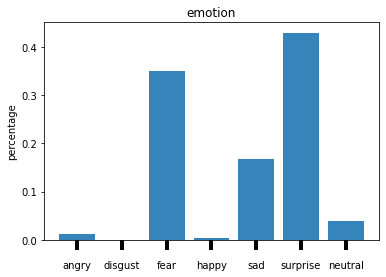

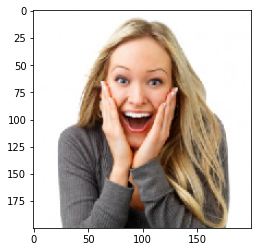

Expression Prediction: surprise


In [ ]:
for img in ['angry-3.png','angry-2.jpg','happy.jpg','angry.jpg','disgust.jpg','fear-1.jpg','fear.jpg','neutral.jpg','sad.jpeg','surprise-1.jpg','surprise-3.jpg','surprise.jpg']:
  display_predictions(img,model_2)

In [ ]:
# Evaluation on PrivateTest
eval = model_2.evaluate(test_X, Y_test)
eval

113/113 [==============================] - 2s 16ms/step - loss: 1.0534 - accuracy: 0.6124


[1.0533806085586548, 0.6124268770217896]

## This is the one of the **best model** I have produced.
I have played around with multiple model architecture, tuned hyperparameters and this is what I could come up with.
 - Try it out on your own and come with better models, its still not the best and will fail badly on many images.
 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


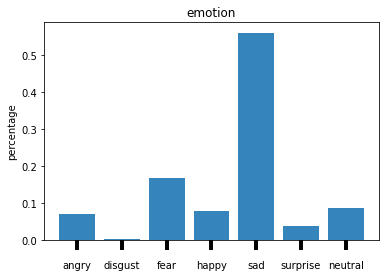

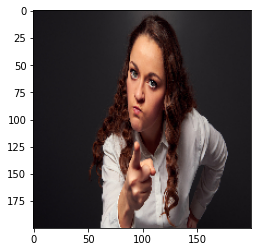

Expression Prediction: sad


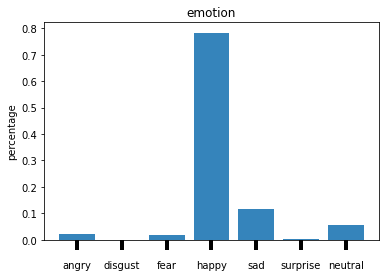

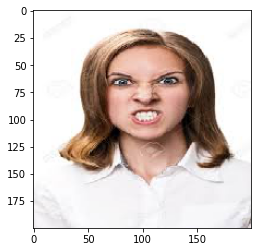

Expression Prediction: happy


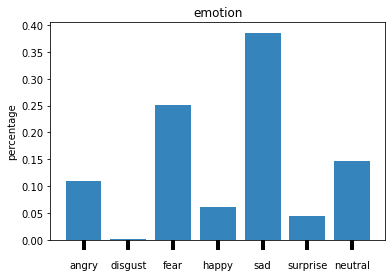

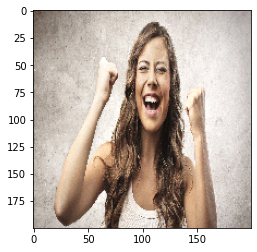

Expression Prediction: sad


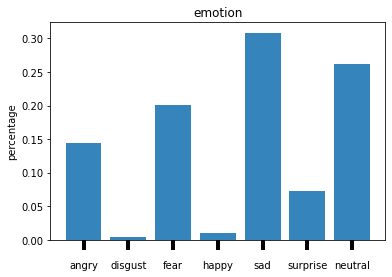

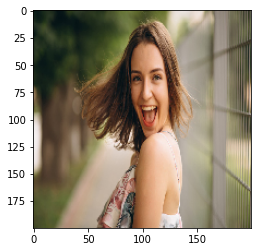

Expression Prediction: sad


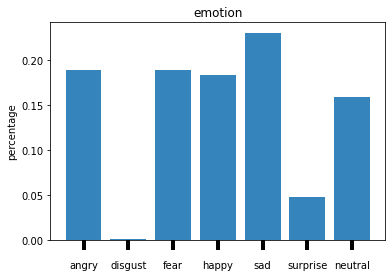

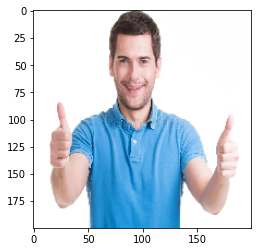

Expression Prediction: sad


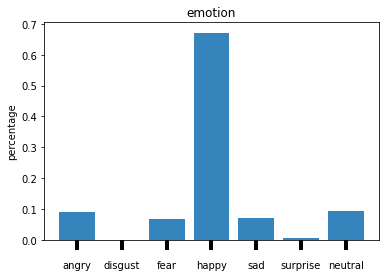

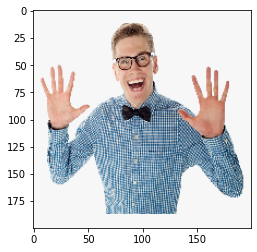

Expression Prediction: happy


In [ ]:
# getting fresh images from internet
nab_model = load_model('nab_model.h5')
for img in ['angry-woman.jpg','angry-woman-2.jpg','happy-woman.png','happy-woman-2.jpg','man-happy.jpg','happy-man-2.png']:
  display_predictions(img,nab_model)

In [ ]:
nab_model = load_model('nab_model.h5')
for img in ['happy-man-2.png']:
  display_predictions(img,nab_model)

# Improvements

### Further improvements on the model can be:
- Getting images from google and categorizing it in different groups, having seperate directories for each.
- Augmentation of images using Image Generator.
   # Hopefully you can come up with a better model than this.

   **Hope you enjoyed the notebook**